<font size=4 color='cornflowerblue'>

# Tarea 4

### Implementar una red neuronal de convolución usando el conjunto de datos mnist.



In [1]:
#### import keras
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import SGD
import keras.backend as K
from keras.layers import BatchNormalization                       
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

np.random.seed(1)
%matplotlib inline

<font size = 5 color="cornflowerblue">

Parte I: **Análisis de datos**

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 1

<font size=4>

Importa y carga la base de datos mnist de Keras:

<font size = 4>

*El conjunto de datos mnist lo pueden obtener directamente de Keras: [mnist Keras](https://keras.io/examples/vision/mnist_convnet/)*

In [2]:
# Escribe el codigo aquí

from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 2

<font size=4>

¿De qué tipo son los conjuntos que obtuviste?

In [3]:
# Escribe el codigo aquí

print("El tipo de x_train es: ", type(x_train))
print("El tipo de y_train es: ", type(y_train))
print("El tipo de x_test es: ", type(x_test))
print("El tipo de y_test es: ", type(y_test))

El tipo de x_train es:  <class 'numpy.ndarray'>
El tipo de y_train es:  <class 'numpy.ndarray'>
El tipo de x_test es:  <class 'numpy.ndarray'>
El tipo de y_test es:  <class 'numpy.ndarray'>


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 3

<font size=4>

¿Qué dimensión tienen los conjuntos que obtuviste?

In [4]:
# Escribe el codigo aquí

print("Las dimensiones de x_train son: ", x_train.shape)
print("Las dimensiones de y_train son: ", y_train.shape)
print("Las dimensiones de x_test son: ", x_test.shape)
print("Las dimensiones de y_test son: ", y_test.shape)

Las dimensiones de x_train son:  (60000, 28, 28)
Las dimensiones de y_train son:  (60000,)
Las dimensiones de x_test son:  (10000, 28, 28)
Las dimensiones de y_test son:  (10000,)


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 4

<font size=4>

¿Cómo se ve una muestra de entrenamiento?, Responde a esta pregunta mostrando un ejemplo, ¿qué representa cada valor en la muestra?

Básicamente lo que tenemos es una representación de las imágenes de entrenamiento, cada una de estas conformadas por 28 X 28 pixeles. Entonces tenemos un arreglo que contiene 28 "filas" por 28 "renglones" y los números presentes en  el arreglo son la escala de grises de la imagen.   

In [5]:
# Escribe el codigo aquí

sample = 1500

print(x_train[sample])
print("\n El valor de la muestra {} del conjunto de entrenamiento correesponde a un: {}.".format(sample, y_train[sample]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 120 223 249 217 244
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 186 254 149  5

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 5

<font size=4>

¿Las muestras estan normalizadas?, (cómo puedes saber esto) si no estan normalizadas, normalizalas. 

*recuerda que en el caso de imágenes la normalizacion es dividir cada pixel por la intensidad máxima (255)*

Las muestras no están normalizadas ya que los valores no se encuentran entre 0 y 1.  

In [6]:
# Escribe el codigo aquí

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 6

<font size=4>


En un ejercicio anterior se obtuvo la muestra en forma de arreglo, ahora muestra la imagen y su correspondiente etiqueta (usa un ejemplo del conjunto de entrenamiento).

La etiqueta de la muestra 1500 del conjunto de entrenamiento correesponde a un 9. 



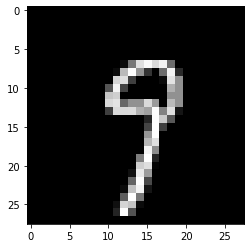

In [7]:
# Escribe el codigo aquí

sample = 1500
plt.imshow(x_train[sample].reshape((28, 28)),cmap='gray')
print("La etiqueta de la muestra {} del conjunto de entrenamiento correesponde a un {}. \n".format(sample, y_train[sample]))

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 7

<font size=4>

Dada una muestra de entrada (input) ¿de qué forma se indica la etiqueta (output)?

In [8]:
# Escribe el codigo aquí

sample = 7253
print("Dada la muestra de entrada (input) {} del conjunto de entrenamiento la forma de la etiqueta (output) es: {}.".format(sample, y_train[sample]))

Dada la muestra de entrada (input) 7253 del conjunto de entrenamiento la forma de la etiqueta (output) es: 1.


La forma de las salidas no esta en representación $\textit{one-hot}$.

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 8

<font size=4>

Convierte el output en representación one-hot.


Hint: Puedes usar la función de Keras [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function)

Observa cómo cambian sus dimensiones (muéstralo usando shape).

In [9]:
# Escribe el codigo aquí

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Las dimensiones de y_train son: ", y_test.shape)
print("Las dimensiones de y_test son: ", y_test.shape)

Las dimensiones de y_train son:  (10000, 10)
Las dimensiones de y_test son:  (10000, 10)


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 9

<font size=4>

Hasta aquí debes tener cuatro conjuntos de datos: los correspondientes a las entradas y las salidas de la red neuronal que se van a usar para el entrenamiento de la red (train_x y train_y) y los correspondientes a las entradas y salidas de la red neuronal que se van a usar para la prueba (test_x, test_y).

Muestra las dimensiones de estos cuatro conjuntos.

In [10]:
# Escribe el codigo aquí

print("Las dimensiones de x_train son: ", x_train.shape)
print("Las dimensiones de y_train son: ", y_train.shape)
print("Las dimensiones de x_test son: ", x_test.shape)
print("Las dimensiones de y_test son: ", y_test.shape)

Las dimensiones de x_train son:  (60000, 28, 28)
Las dimensiones de y_train son:  (60000, 10)
Las dimensiones de x_test son:  (10000, 28, 28)
Las dimensiones de y_test son:  (10000, 10)


<font size = 5 color="cornflowerblue">

Parte II: **Implemetación de la red neuronal**

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 10

<font size=4>

Implementa una red neuronal de convolución dentro de una función (como lo hemos visto en clase). Puedes guiarte con el notebook de la clase 10 o de [mnist Keras](https://keras.io/examples/vision/mnist_convnet/) *(no uses la misma arquitectura que se da)*.

Cuida que la función que implementes sea flexible, es decir, que si cambiamos las dimensiones de las entradas no se tenga que modificar la función directamente, más bien indicarlo como un argumento de la función. 

In [11]:
# Escribe el codigo aquí

def architecture(input_shape, num_classes, activation):
    model = keras.Sequential(
      [
          keras.Input(shape=input_shape),
       
          layers.Conv2D(28, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform', bias_initializer='zeros', activation=activation),
       
          layers.Conv2D(28, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform', bias_initializer='zeros', activation=activation),
       
          layers.MaxPooling2D(pool_size=(2, 2)),
       
          layers.Conv2D(14, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform', bias_initializer='zeros', activation=activation),

          layers.Conv2D(14, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform', bias_initializer='zeros', activation=activation),
       
          layers.MaxPooling2D(pool_size=(2, 2)),
       
          layers.Flatten(),
          
          layers.Dense(686, kernel_initializer='he_uniform',bias_initializer='zeros'),
       
          layers.Dense(343, kernel_initializer='he_uniform',bias_initializer='zeros'),
       
          layers.Dense(num_classes, activation="softmax"),
      ]
    ) 
    
    return model


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 11

<font size=4>

Crea el modelo definido en el ejercicio anterior (es decir llama a la función que creaste con los argumentos adecuados).

In [12]:
# Escribe el codigo aquí

input_shape = (28, 28, 1)
num_classes = 10
activation='sigmoid'

model = architecture(input_shape, num_classes, activation)

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 12

<font size=4>

Usa la función plot_model para obtener una representación esquemática del modelo implementado. 

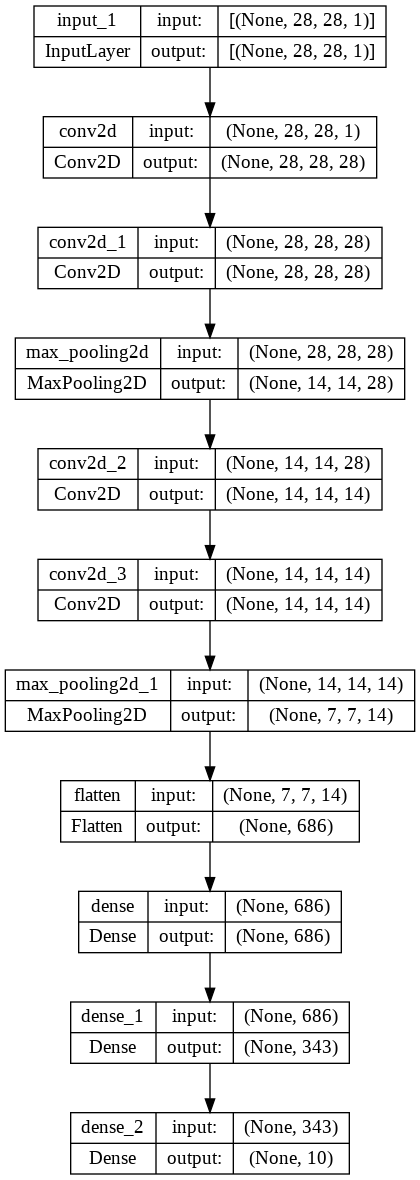

In [13]:
# Escribe el codigo aquí

plot_model(model, show_shapes=True, show_layer_names=True)

<font size=4 color='black'> 
 [plot_model](https://keras.io/visualization/#training-history-visualization)

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 13

<font size=4>

¿Cuántos parámetros tiene el modelo de red neuronal que implementaste? 

Puedes responder a esta pregunta usando el atributo summary(). 

In [14]:
# Escribe el codigo aquí
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 14)        3542      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 14)        1778      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 14)         0         
 2D)                                                    

Hay 723,047 parámetros.

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 14

<font size=4>

Compila el modelo seleccionando un optimizador (con una tasa de aprendizaje seleccionable, es decir, no uses los valores por defecto), la función de costo (loss) y una metrica adecuadas para este problema.

Hint: en la clase 10 revisamos un problema similar, puedes consultar la función de costo y la métrica utilizada. 

In [15]:
# Escribe el codigo aquí
learning_rate = 0.015

optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0, nesterov=False)

In [16]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

In [17]:
model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 15


<font size=4>

Entrena la red neuronal que implementaste, indica la cantidad de datos a usar para validar el modelo, el número de epocas a utilizar así como el tamaño del batch. No olvides usar shuffle=True.

In [18]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [19]:
# Escribe el codigo aquí

#10 % of the training data will be used to validate the training
start_time = time.time()

validation_portion = 0.1
batch_size=128
num_epochs = 100

history = model.fit(x=x_train, y=y_train, epochs=num_epochs, batch_size=batch_size, \
                            validation_split=validation_portion, shuffle=True, verbose=1)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/100
422/422 [==============================] - 8s 8ms/step - loss: 2.3605 - accuracy: 0.1031 - val_loss: 2.3131 - val_accuracy: 0.1050
Epoch 2/100
422/422 [==============================] - 3s 7ms/step - loss: 2.3089 - accuracy: 0.1071 - val_loss: 2.3115 - val_accuracy: 0.0992
Epoch 3/100
422/422 [==============================] - 3s 7ms/step - loss: 2.3033 - accuracy: 0.1167 - val_loss: 2.2977 - val_accuracy: 0.0993
Epoch 4/100
422/422 [==============================] - 3s 7ms/step - loss: 2.2945 - accuracy: 0.1212 - val_loss: 2.2798 - val_accuracy: 0.1950
Epoch 5/100
422/422 [==============================] - 3s 8ms/step - loss: 2.2208 - accuracy: 0.2154 - val_loss: 1.9749 - val_accuracy: 0.3463
Epoch 6/100
422/422 [==============================] - 3s 7ms/step - loss: 1.0869 - accuracy: 0.6869 - val_loss: 0.5306 - val_accuracy: 0.8495
Epoch 7/100
422/422 [==============================] - 3s 7ms/step - loss: 0.5362 - accuracy: 0.8389 - val_loss: 0.3953 - val_accuracy: 0.8840

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 16

<font size=4>

Grafica el costo en función de la epoca para los conjuntos de entrenamiento y de validación.

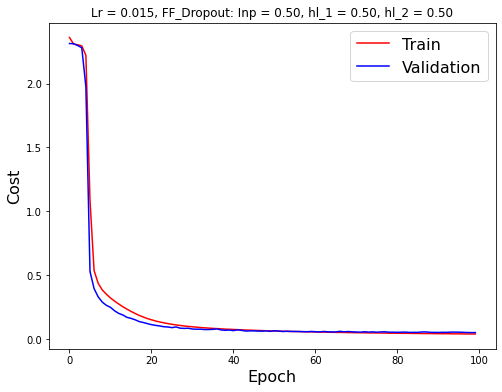

In [20]:
# Escribe el codigo aquí

plt.figure(figsize=(8,6))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Lr = 0.015, FF_Dropout: Inp = 0.50, hl_1 = 0.50, hl_2 = 0.50')
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch',size=16)
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=16)
plt.show()

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 17


<font size=4>

Grafica el accuracy (la precisión del modelo) en función de la epoca para los conjuntos de entrenamiento y de validación.

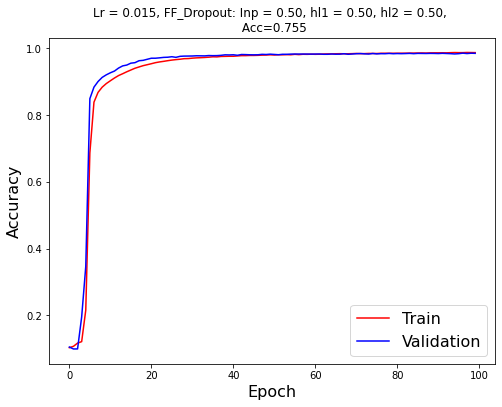

In [21]:
# Escribe el codigo aquí

plt.figure(figsize=(8,6))

plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Lr = 0.015, FF_Dropout: Inp = 0.50, hl1 = 0.50, hl2 = 0.50, \n Acc=0.755')
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='lower right', fontsize=16)
plt.show()

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 18

<font size=4>

Evalua el modelo en el conjunto de prueba. Usa el métodod evaluate()

In [22]:
# Escribe el codigo aquí

evaluations = model.evaluate(x = x_test, y = y_test)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.0438 - accuracy: 0.9857
Loss = 0.04378857836127281
Test Accuracy = 0.9857000112533569


<font size = 5 color="cornflowerblue">

Parte III: **Inferencia**

<font size=4 color='rosybrown'>
    
    
#### Ejercicio 19

<font size=4>

Realiza predicciones sobre el conjunto de prueba. Usa el método predict()

Muestra algun ejemplo, es decir dado un input tomado del conjunto test_x muestra cuál es la inferencia realizada por la red neuronal y cual es la etiqueta real (la correspondiente test_y).

In [23]:
# Escribe el codigo aquí
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
sample = 31

prediction = np.argmax(predictions[sample])

print("Para la muestra numero {} la predicción es el dígito: {}".format(sample, prediction))

Para la muestra numero 31 la predicción es el dígito: 1


La muestra numero 31 esta asociada al dígito: 1


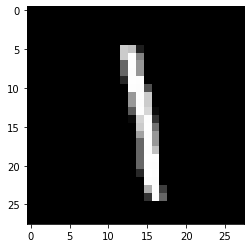

In [25]:
plt.imshow(x_test[sample].reshape((28, 28)), cmap='gray')

print("La muestra numero {} esta asociada al dígito: {}".format(sample, np.argmax(y_test[sample])))